## Importing Basic Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset<br>
In the below cell we are loading the data with pandas

In [3]:
# Using pd.read_csv(filename) to read the file and store it in a handle

data = pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Displaying the Info on Data

In [4]:
# To see how many Non-null data present in each coloumn

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Filtering out Incomplete Data-Sets

In [5]:
# Drop the rows where all coloumns not present 

data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


## Splitting Train and Test Data 

In [7]:
# Import train, test split 
from sklearn.model_selection import train_test_split

data['in_cat'] = np.ceil(data['median_income']/1.5)

# From x-input drop media house value as it is the output we are trying to predict 
X = data.drop(['median_house_value'],axis=1)
y = data['median_house_value']


# Split x and y data into train and test data for training and testing model in a 4:1 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state = 42)
train_data = X_train.join(y_train)

In [8]:
train_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,in_cat,median_house_value
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,<1H OCEAN,4.0,227600.0
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,INLAND,3.0,110400.0
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,INLAND,3.0,248100.0
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,<1H OCEAN,2.0,305600.0
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,NEAR OCEAN,3.0,214600.0
...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,<1H OCEAN,4.0,273400.0
12081,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965,<1H OCEAN,4.0,160800.0
5447,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990,<1H OCEAN,3.0,335400.0
866,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879,NEAR BAY,4.0,231200.0


## Displaying Histogram for Train data 

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'in_cat'}>],
       [<Axes: title={'center': 'median_house_value'}>, <Axes: >,
        <Axes: >]], dtype=object)

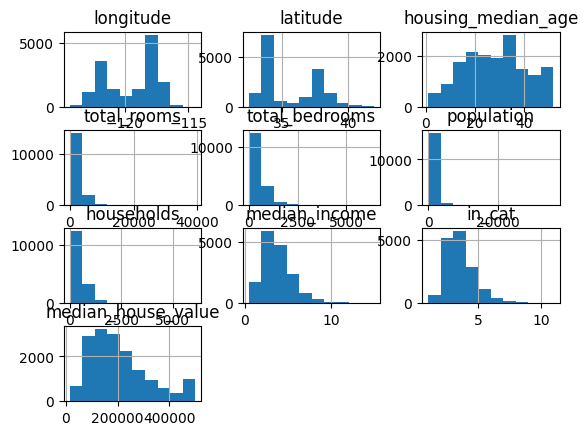

In [9]:
# Data.hist() to display the histogram for the data 

train_data.hist()

## Dispalying the Log normal Distribution of data 

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'in_cat'}>],
       [<Axes: title={'center': 'median_house_value'}>, <Axes: >,
        <Axes: >]], dtype=object)

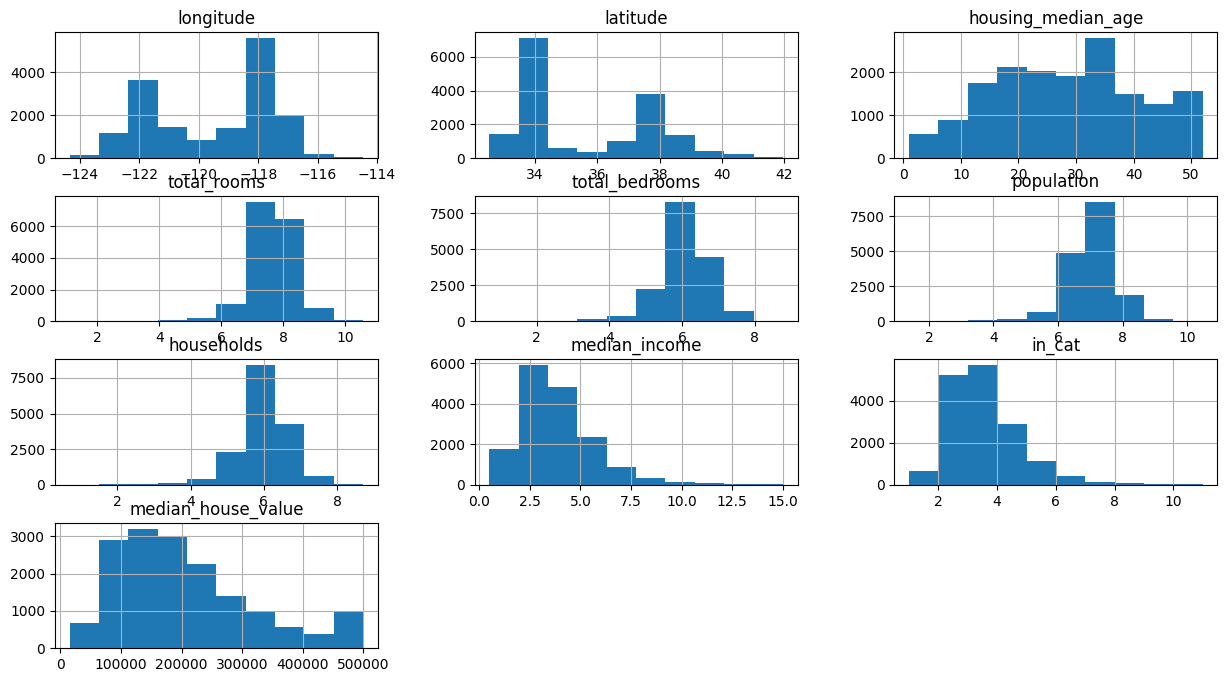

In [10]:
# np.log() to take log of a function 
# Converting to log distribution to get more accurate results

train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)
train_data.hist(figsize=(15,8))

## Converting Ocean data <br>
Converting ocean proximity data to 1,0 (boolean variables) to analyise it's affect on cost of homes

In [11]:
# To see the counts of houses with proximity factor

train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7231
INLAND        5156
NEAR OCEAN    2114
NEAR BAY      1842
ISLAND           3
Name: count, dtype: int64

In [12]:
# Each variable is converted in as many 0/1 variabls as there are different
# Values using the pd.get_dummies function after that we drop the proximity coloumn

train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [13]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,in_cat,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17727,-121.80,37.32,14.0,8.392310,6.829794,7.900637,6.793466,4.7027,4.0,227600.0,True,False,False,False,False
2057,-119.63,36.64,33.0,6.944087,5.204007,6.431331,5.164786,3.4107,3.0,110400.0,False,True,False,False,False
6453,-118.06,34.12,25.0,8.266678,6.744059,7.522400,6.633318,3.6639,3.0,248100.0,False,True,False,False,False
4619,-118.31,34.07,28.0,7.767687,6.856462,7.922986,6.796824,2.2364,2.0,305600.0,True,False,False,False,False
15266,-117.27,33.04,27.0,7.517521,5.973810,7.172425,6.003887,3.5500,3.0,214600.0,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,8.003697,6.216606,7.271009,6.118097,5.4286,4.0,273400.0,True,False,False,False,False
12081,-117.54,33.76,5.0,8.673684,6.943122,8.089176,6.909753,4.7965,4.0,160800.0,True,False,False,False,False
5447,-118.42,34.01,42.0,7.374629,5.913503,6.859615,5.894403,3.0990,3.0,335400.0,True,False,False,False,False
866,-122.04,37.57,12.0,8.651724,6.970730,8.142354,6.964136,5.2879,4.0,231200.0,False,False,False,True,False


## Price Distribution Plot

<Axes: xlabel='latitude', ylabel='longitude'>

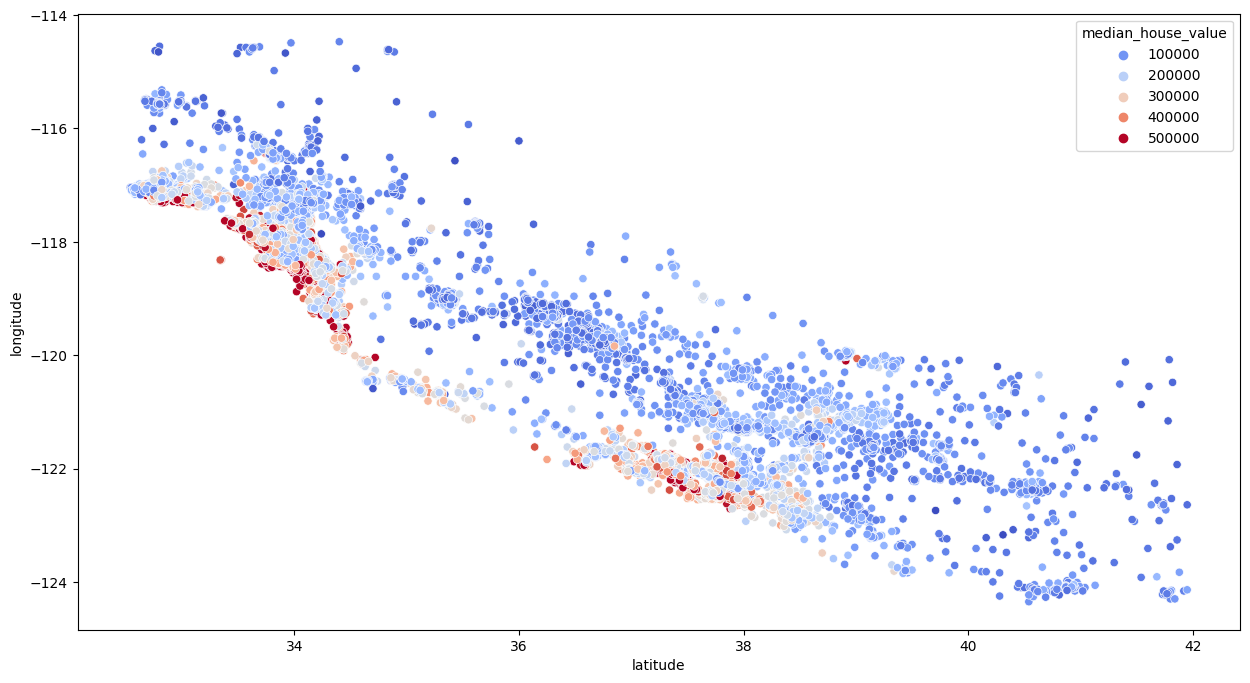

In [14]:
# Using sns.scatterplot to get the scatterplot for the price distribution of houses with respect to lattitude and longitude

plt.figure(figsize=(15,8)) 

sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

## Adding more variables

In [15]:
# Since we know total bedrooms w.r.t total rooms are independent but interdependent , means their relation can influence
# The price of house , same goes for rooms and households

train_data['bedroom_ratio']= train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']= train_data['total_rooms']/train_data['households']

In [16]:
# Importing the Linear Regression Model and the Standard Scalar function to Scale the input value to value between 0-1

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

## Training a Linear regression Model

In [17]:
# Dropping median house value from x_train and making y_train median house value as that what we are trying to predict
X_train, y_train = train_data.drop(['median_house_value'],axis=1), train_data['median_house_value']

# Using scaler.fit_transform to scale the data before fitting 
X_train_s = scaler.fit_transform(X_train)

In [18]:
# Assigning obj Linear Regression() to reg which we will train
reg = LinearRegression()

# Using reg.fit we can train the model to find the linear regression pattern between X_train & y_train
reg.fit(X_train_s, y_train) 

LinearRegression()

In [19]:
# Running the same functions we ran on X_train on X_test 
# Preferably pre-define functions so we don't have to repeat same steps for both data sets 
test_data = X_test.join(y_test)
test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

# Adding same variables as X_train to X_test 
test_data =test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)
test_data['bedroom_ratio']= test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']= test_data['total_rooms']/test_data['households']

In [20]:
# Splitting X_test and y_test and scaling X_test 
X_test, y_test = test_data.drop(['median_house_value'],axis=1), test_data['median_house_value']
X_test_s = scaler.transform(X_test)


In [21]:
# reg.score is used to find accuracy for model reg by using the test set
reg.score(X_test_s,y_test)

0.6687274235338259

## Training a RandomForestRegressor Model 

In [22]:
# import the RandomForestRegressor Model
from sklearn.ensemble import RandomForestRegressor

# Assign object RandomForestRegressor() to forest
forest = RandomForestRegressor()

# Train the model using forest.fit using train data set
forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [23]:
# forest.score used to find the accuracy of the model using the test set
forest.score(X_test_s, y_test)

0.8197658827598018

## Grid Search to find the best parameters for RandomForestregressor Model

In [27]:
from sklearn.model_selection import GridSearchCV
forest = RandomForestRegressor()

# Param_grid is a Dictionary with parameters names (str) as keys and lists of parameter settings to try as values, 
# or a list of such dictionaries, in which case the grids spanned by each dictionary in the list are explored. 
# This enables searching over any sequence of parameter settings.

# {'bootstrap': True,------- Method for sampling data points (with or without replacement)
#  'criterion': 'mse',
#  'max_depth': None, ------- Max number of levels in each decision tree
#  'max_features': 'auto',----- Max number of features considered for splitting a node
#  'max_leaf_nodes': None,
#  'min_impurity_decrease': 0.0,
#  'min_impurity_split': None,
#  'min_samples_leaf': 1,------ Min number of data points allowed in a leaf node
#  'min_samples_split': 2,----- Min number of data points placed in a node before the node is split
#  'min_weight_fraction_leaf': 0.0,
#  'n_estimators': 10,------ Number of trees in the foreset
#  'n_jobs': 1,
#  'oob_score': False,
#  'random_state': 42,
#  'verbose': 0,
#  'warm_start': False}

# All of these are hyper-parameters that are present

param_grid = {
    "n_estimators":[300,500,700],
    "max_depth":[2048,4096],
    "min_samples_split":[4,8]
}

# To search for the best hyperparameters among the parameters defined in param_grid
grid_search = GridSearchCV(forest, param_grid, cv=5,
                          scoring = None,
                          return_train_score=True)

grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2048, 4096], 'min_samples_split': [4, 8],
                         'n_estimators': [300, 500, 700]},
             return_train_score=True)

In [28]:
print(grid_search.best_params_)

# Assigning model with best hyperparameters to best_forest
best_forest=grid_search.best_estimator_

{'max_depth': 4096, 'min_samples_split': 4, 'n_estimators': 700}


## Minor Improvement in accuracy seen after using New parameters

In [29]:
# Using best_forest.score to test accuracy of tuned RandomForestRegressor Model
best_forest.score(X_test_s, y_test)

0.8225199071511509